# VISUALIZATION
* MATPLOTLIB
* SEABORN
* PLOTLY
* Widgets

In [383]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
data_df = pd.DataFrame(columns=feature_names, data=data)
data_df["target"] = target
data_df['name'] = data_df["target"].apply(lambda target: target_names[target])

In [384]:
data_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target    name  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa

# Matplotlib

<font color = green >

## Matplotlib layers 
</font>

* `backend layer` deals with actual drawing 
* `artist layer` on top of the backend  describes how data is arranged (aka `matplotlib api`)
* `scripting layer` - actually creates artists and choreographs them all together

<font color = green >

### Structure summary 
</font>

<b>scripting layer - for most usage. Note : it captures current figure and current axis </b>
<br>&emsp;&emsp;`plt`
<br>&emsp;&emsp;&emsp;&emsp;how to get: import matplotlib.pyplot as plt 
<br>&emsp;&emsp;&emsp;&emsp;samples: `plt.plot, plt.title, plt.show, plt.text, plt.tick_params, etc.`)
<br><b>artist layer - use for more complicated / for tuning </b>
<br>&emsp;&emsp;`axis` 
<br>&emsp;&emsp;&emsp;&emsp;how to get: fig.add_subplot() / plt.gca() / plt.gcf().get_axes()
<br>&emsp;&emsp;&emsp;&emsp;samples: ax.spines, ax.axis, ax.get_xbound, ax.arrow, ax.set_title, ax.set_ylabel etc.) 
<br>&emsp;&emsp;`figure` 
<br>&emsp;&emsp;&emsp;&emsp;how to get: from matplotlib.figure import Figure / plt.figure / plt.gcf()
<br>&emsp;&emsp;&emsp;&emsp;samples: FigureCanvasAgg(fig), fig.add_subplot, fig.savefig, fig.canvas, etc.) </li>
<br><b>backend layer - use for configuration / for tuning </b>
<br>&emsp;&emsp;`canvas` 
<br>&emsp;&emsp;&emsp;&emsp;how to get: import matplotlib as mpl
<br>&emsp;&emsp;&emsp;&emsp;samples: mpl.cm, mpl.colors, mpl.colorbar  etc.)

***
<font color = green >

# Setup backend
</font>


A backend is an abstraction layer which knows how to interact with the operating environment, whether it's an operating system, or an environment like the browser, and knows how to render matplotlib commands
<br>

*Note: some backends don't support some features particularly interaction features*

In [385]:
import matplotlib as mpl
mpl.get_backend()
# Output: 'module://ipykernel.pylab.backend_inline'

'module://matplotlib_inline.backend_inline'

Setup matplotlib backend
`%matplotlib notebook`

In [386]:
%matplotlib notebook
# %matplotlib inline
mpl.get_backend()
# Output : 'nbAgg'

'nbAgg'

<font color = green >

### working on mac os
</font>

In case of error on Mac:
<br>`RuntimeError: Python is not installed as a framework. The Mac OS X backend will not be able to function correctly if Python is not installed as a framework.`
<br>Use:
<br>`import matplotlib`
<br>`matplotlib.use('TkAgg')`
<br>
`print (matplotlib.get_backend())`
<br>
`# out: TkAgg`

also include `plt.show()` after plot configuration

***

### Imports

In [356]:
import matplotlib.pyplot as plt
import numpy as np

***
<font color = green >

## plot 
</font>


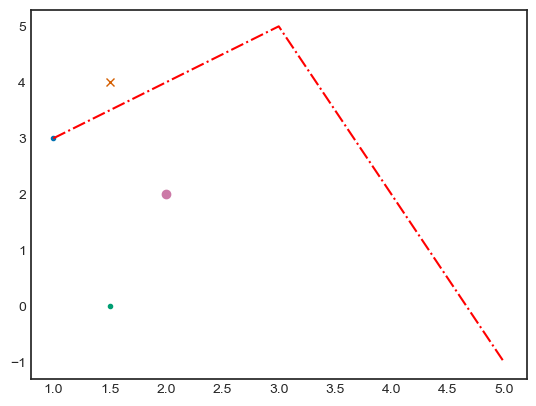

In [398]:
fig = plt.figure()

plt.plot(1, 3, '.') # no mark
plt.plot(1.5, 0, '.') # small point
plt.plot(1.5, 4, 'x') # x mark
plt.plot(2, 2, 'o')
plt.plot([1, 3, 5], [3, 5, -1], '-.', c='red') # joined
plt.show();
# Note
    # different colors since it considers as different series
    # This is scripting layer

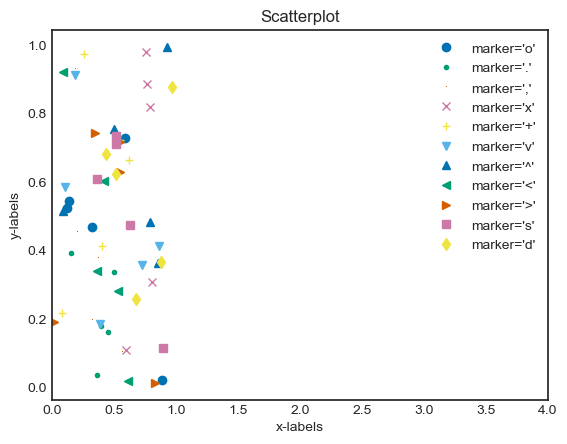

In [399]:
rng = np.random.RandomState(2023)

# create new figure
fig = plt.figure()

for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label=f"marker='{marker}'")

plt.legend()
plt.xlim(0, 4);
plt.title('Scatterplot')
plt.xlabel('x-labels')
plt.ylabel('y-labels');

<IPython.core.display.Javascript object>


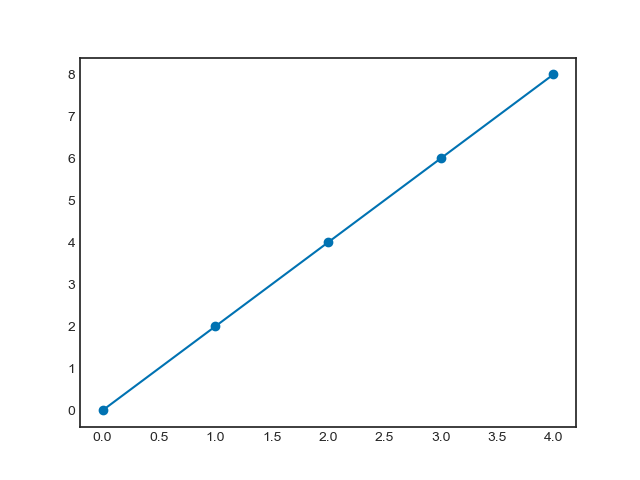

In [359]:
fig = plt.figure()

y = np.arange(0, 10, 2)
plt.plot(y, '-o');
# Note x-vals resolved automatically

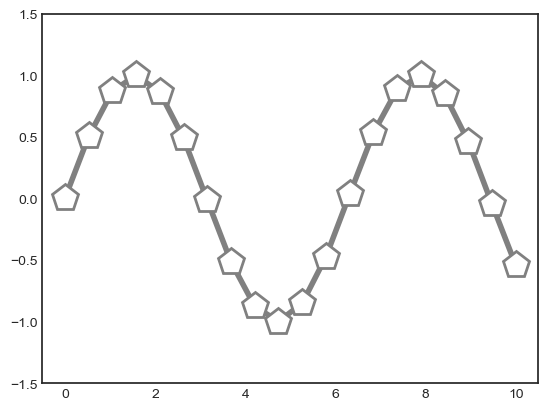

In [400]:
x = np.linspace(0, 10, 20)
y = np.sin(x)

fig = plt.figure()

plt.plot(
    x,
    y,
    '-p',
    color='gray',
    markersize=20,
    linewidth=4,
    markerfacecolor='white',
    markeredgecolor='gray',
    markeredgewidth=2
)

plt.ylim(-1.5, 1.5);

<font color = green >

#### fill_between
</font>

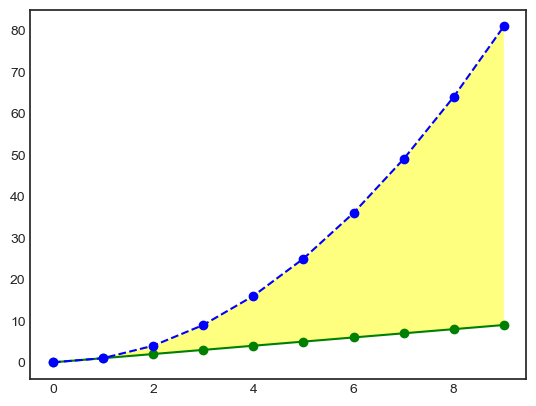

In [401]:
fig = plt.figure()
linear_data = np.arange(10)
exponential_data = linear_data ** 2
plt.plot(linear_data, '-og')
plt.plot(exponential_data, '--ob')
plt.fill_between(range(10), linear_data, exponential_data, facecolors='yellow', alpha=0.5);

*** 
<font color = green >

## Major drawing types  
</font>


<font color = green >

### Scatter
</font>

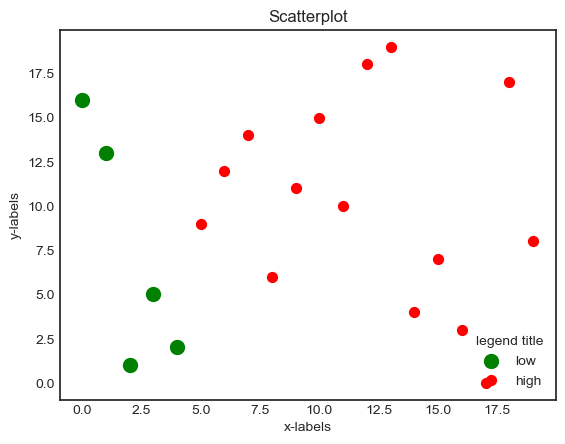

In [405]:
# Use scatter when you don't need to keep consequence of data 

# create some series for x-vals 
x = np.arange(20)

# create some series for y-vals 
y = x.copy()
np.random.shuffle(y)

# create new figure
fig = plt.figure()

# draw 2 scatters  
plt.scatter(x[:5], y[:5], c='g', s=100, label='low')  
plt.scatter(x[5:], y[5:], color='r', s=50, label='high')

plt.title('Scatterplot')

plt.legend(loc=4, title='legend title')
plt.xlabel('x-labels')
plt.ylabel('y-labels');


<font color = green >

### Plot 
</font>

The primary difference of plt.scatter from plt.plot is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

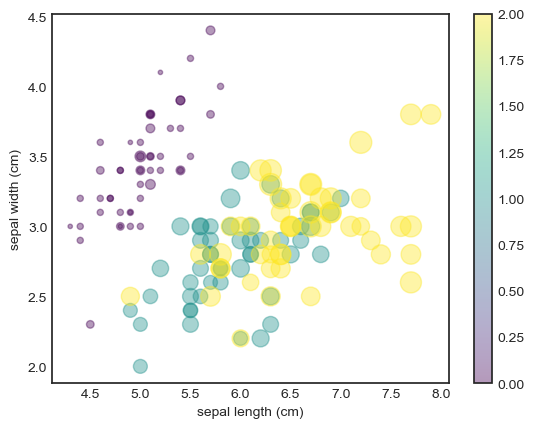

In [408]:
features = iris.data.T

fig = plt.figure()

plt.scatter(
    features[0],
    features[1],
    alpha=0.4,
    s=100*features[3],
    c=iris.target,
    cmap='viridis'
)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);
plt.colorbar(); # show color scale

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data: the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower. Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.


<font color = green >

### Barchart 
</font>

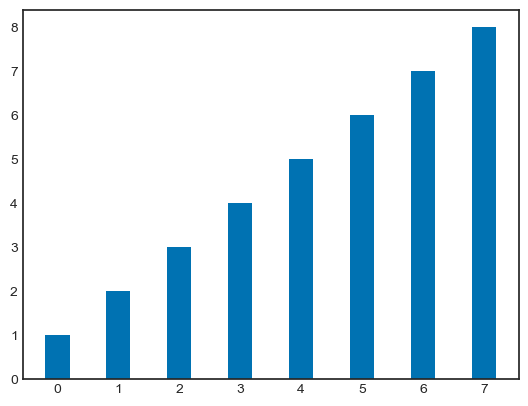

In [418]:
fig = plt.figure()
linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])
x_vals = np.arange(len(linear_data))
plt.bar(x_vals, linear_data, width=0.4);


<font color = green >

#### Horizontal barchart 
</font>

<IPython.core.display.Javascript object>


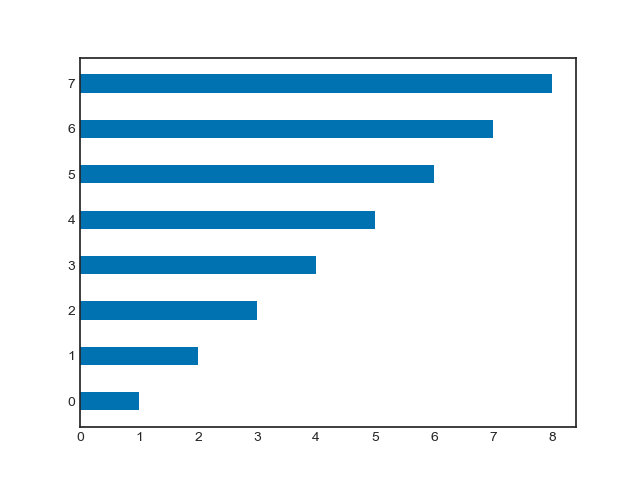

In [365]:
fig = plt.figure()
plt.barh(x_vals, linear_data, height=0.4);


<font color = green >

#### Difference on barchart 
</font>

<BarContainer object of 8 artists>

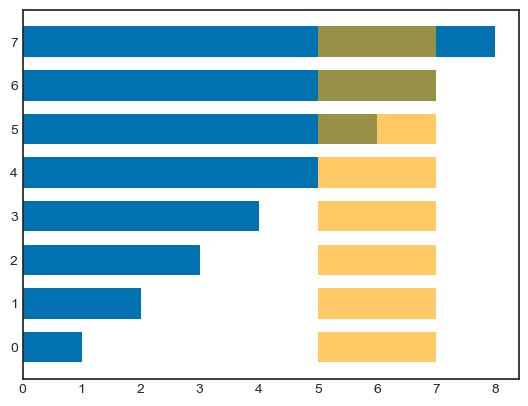

In [423]:
fig = plt.figure()

quadratic_data = linear_data ** 2
plt.barh(x_vals, linear_data, height=0.7)

n = len(x_vals)
added_const = np.array([2]*n)
plt.barh(x_vals, added_const, height=0.7, color='orange', left=5, alpha = .6)
# plt.barh(x_vals, quadratic_data, height=0.7, color='orange', left=linear_data, alpha = .6);

<font color = green >

### Histogram
</font>

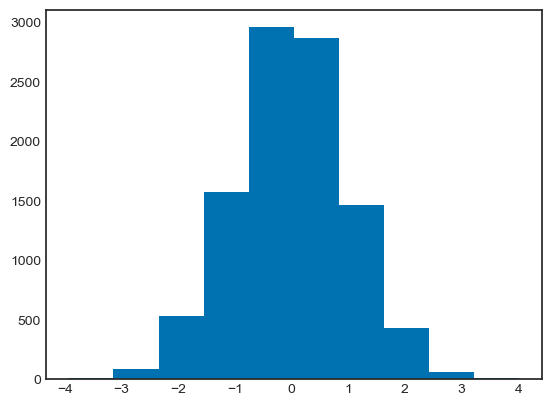

In [426]:
data = np.random.randn(10000)

fig = plt.figure()
plt.hist(data);

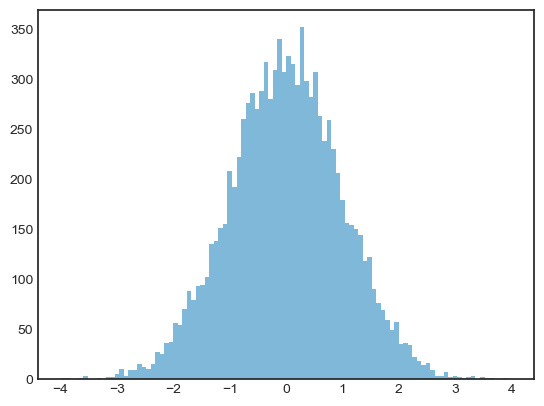

In [428]:
fig = plt.figure()

plt.hist(
    data,
    bins=100,
    alpha=0.5,
    range=(-4,4),
#     histtype='stepfilled',
#     color='steelblue',
    edgecolor='black'
);

<IPython.core.display.Javascript object>


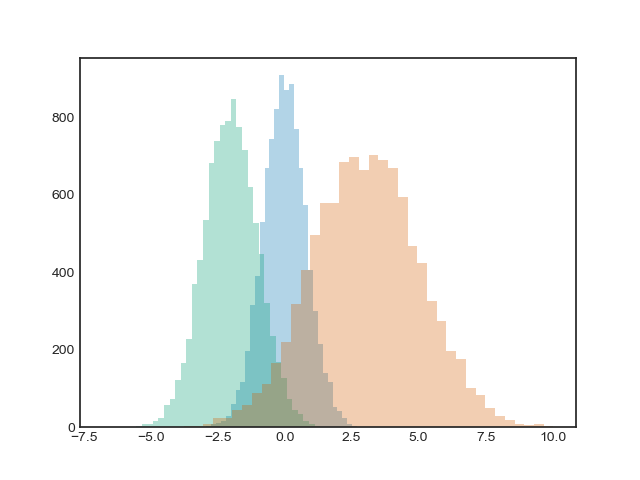

In [369]:
x1 = np.random.normal(0, 0.8, 10000)
x2 = np.random.normal(-2, 1, 10000)
x3 = np.random.normal(3, 2, 10000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

fig = plt.figure()
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

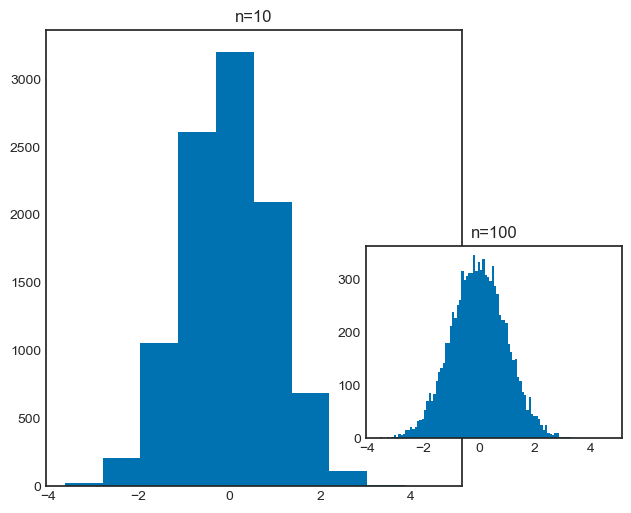

In [429]:
fig = plt.figure()
ax1= fig.add_axes([0, 0, 0.65, .95])
ax2 = fig.add_axes([0.5, 0.1, 0.4, 0.4])
sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
ax1.hist(sample)
ax1.set_title('n=10')

ax2.hist(sample, bins=100) # hist displays by default 10 bins
ax2.set_title('n=100');

<font color = green >

### Heatmap
</font>

In [372]:
%matplotlib inline

In [375]:
plt.hist2d?

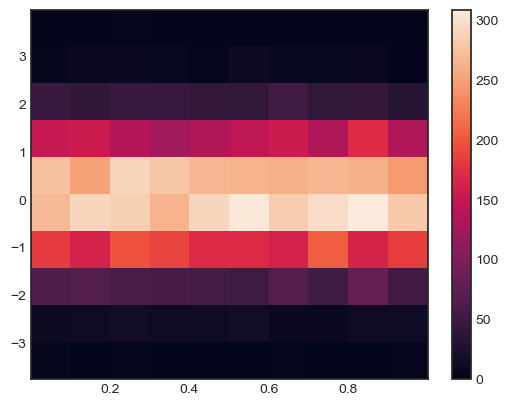

In [432]:
fig = plt.figure()

x = np.random.random(size=10000)
y = np.random.normal(loc=0.0, scale=1.0, size=10000)

plt.hist2d(x, y, bins=10, cmap='rocket')

plt.colorbar();

<font color = green >

### Subplots
</font>

<font color = green >

### sublot
</font>

The most basic method of creating an axes is to use the plt.axes function

Inset axes at the top-right corner of another axes by setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure)

<IPython.core.display.Javascript object>


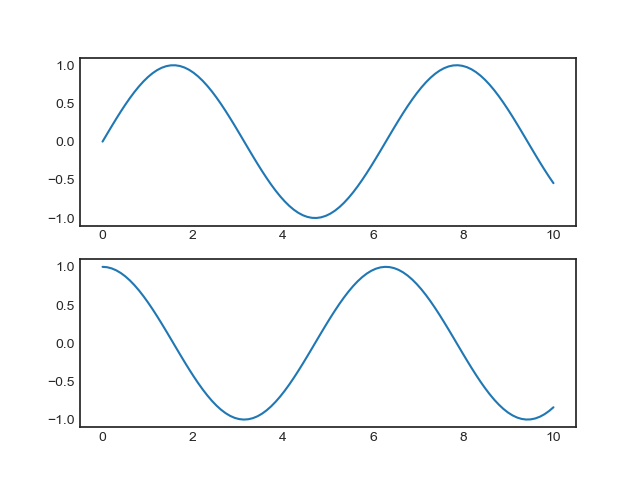

In [157]:
x = np.linspace(0, 10, 100)

plt.figure() # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

plt.subplot: Simple Grids of Subplots

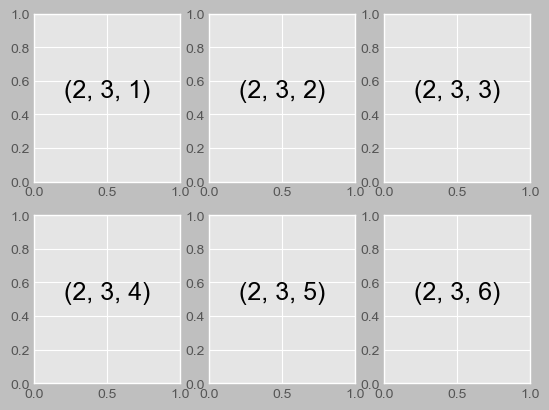

In [434]:
fig = plt.figure()
plt.style.use('ggplot')

for i in range(1, 7): 
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

<font color = green >

### style
</font>

In [159]:
# Review the style : https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
plt.style.available # see the pre-defined styles provided

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

The command plt.subplots_adjust can be used to adjust the spacing between these plots

<IPython.core.display.Javascript object>


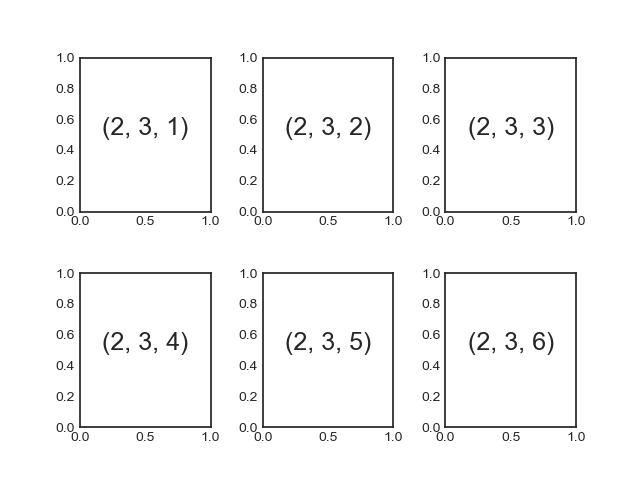

In [160]:
fig = plt.figure()

fig.subplots_adjust(hspace=0.4, wspace=0.4) 
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center');

C:\Users\shchur\AppData\Local\Temp\ipykernel_17880\1302537299.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')


<IPython.core.display.Javascript object>


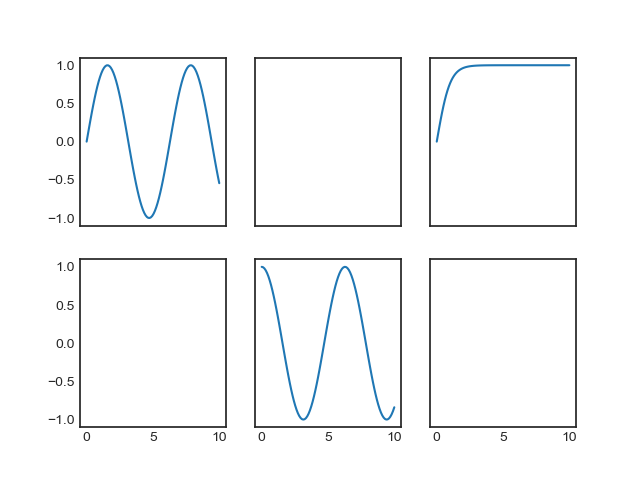

In [161]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
ax[0,0].plot(x, np.sin(x))
ax[0,2].plot(x, np.tanh(x))
ax[1,1].plot(x, np.cos(x));

<IPython.core.display.Javascript object>


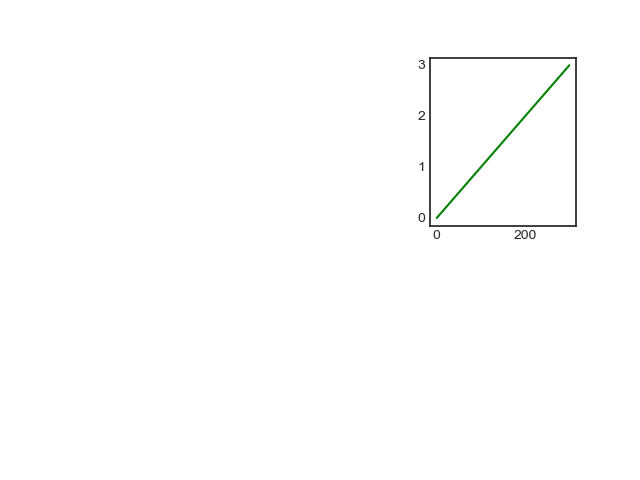

In [162]:
%matplotlib notebook

fig = plt.figure()
vals = np.arange(0.0, 3.0, 0.01)
ax2 = plt.subplot(2,3,3) # use 5th cell of created table of 2 rows and  3 columns 
ax2.plot(vals, c='g');

In [164]:
%matplotlib inline

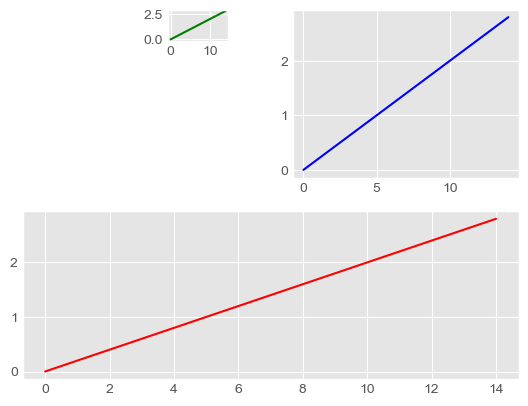

In [438]:
fig = plt.figure()
ax1 = plt.subplot(2,1,2)  # create 2 cells and  use 2nd
ax1.plot(vals, c='r')

ax2 = plt.subplot(10,7,3) # create 4 cells and  use 1st
ax2.plot(vals, c='g')

ax3 = plt.subplot(222) # create 4 cells and  use 2nd
ax3.plot(vals, c='b');

<font color = green >

### sublots
</font>

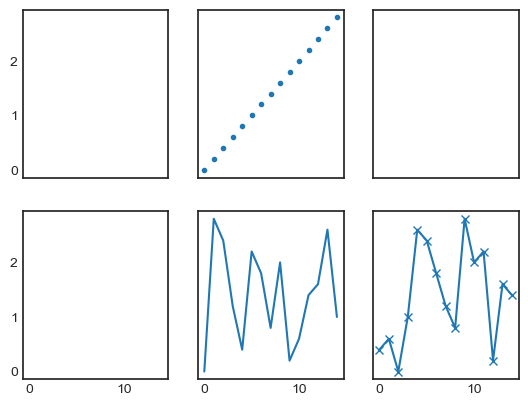

In [167]:
# Note: it returns not only axes but figure as first el of tuple 
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True) # Note : this creates new figure
vals = np.arange(0.0, 3.0, 0.2)
plt.plot(np.random.permutation(vals), '-x') # Note: the last axis is active 
ax2.plot(vals, '.')
ax5.plot(np.random.permutation(vals), '-');

<font color = green >

### gridspec
</font>

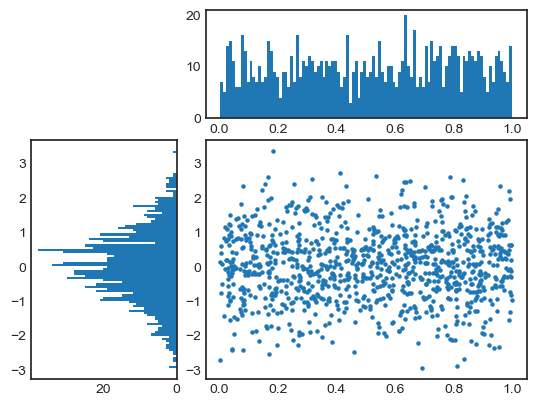

In [168]:
import matplotlib.gridspec as gridspec  
x = np.random.random(size=1000)
y = np.random.randn(1000)

plt.figure()  # new figure
gspec = gridspec.GridSpec(3, 3)

# get necessary axes
ax_top_histogram = plt.subplot(gspec[0, 1:])  # this returns axis
ax_side_histogram = plt.subplot(gspec[1:, 0])
ax_lower_right = plt.subplot(gspec[1:, 1:])

# make necessary drawwing 
ax_lower_right.scatter(x, y, s= 5)  # regular scatter
ax_top_histogram.hist(x, bins=100)  # Note:  normed=True, scales to 0-1 range. 
ax_side_histogram.hist(y, bins=100, orientation='horizontal')
ax_side_histogram.invert_xaxis()  # flip the histogram for more natural view 


<font color = green >

### remove junk 
</font>

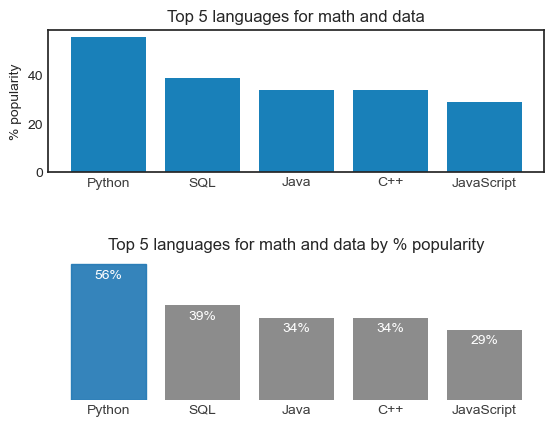

In [201]:
plt.figure()

# use subplot to demonstrate difference  
ax1 = plt.subplot(2,1, 1)
languages = ['Python','SQL', 'Java','C++', 'JavaScript']
popularity = np.array([56,39,34,34,29])
x_vals= range(len(popularity))
plt.bar (x_vals,popularity,align= 'center',alpha = 0.9)
plt.xticks(x_vals,languages,alpha = 0.9 )

plt.ylabel('% popularity')
plt.title('Top 5 languages for math and data')

ax_2 = plt.subplot(2,1,2)

languages = ['Python','SQL', 'Java','C++', 'JavaScript']
popularity = np.array([56,39,34,34,29])
x_vals= range(len(popularity))

bar_2= plt.bar (x_vals,popularity,align= 'center',alpha = 0.9, color= 'grey')
bar_2[0].set_color('#1F77B4')

plt.xticks(x_vals, languages, alpha=0.9)

# move the y-label to title 
plt.title('Top 5 languages for math and data by % popularity')

# hide axes ticks and y-axis labels 

plt.tick_params(
    top =False,
    bottom= True,
    left  = False,
    labelleft = False, 
    labelbottom = True 
    )


for bar in bar_2:
    ax_2.text(
        bar.get_x() + bar.get_width()/2, # set x position
        bar.get_height()-6, # set y position
        '{}%'.format(bar.get_height()), # # provide text
        ha= 'center',
        color= 'w',
        fontsize= 10
    )

for spine in ax_2.spines.values():
    spine.set_visible(False)


plt.subplots_adjust(hspace = .6)

***
<font color = green >

## Animation
</font>

In [439]:
%matplotlib notebook

<IPython.core.display.Javascript object>


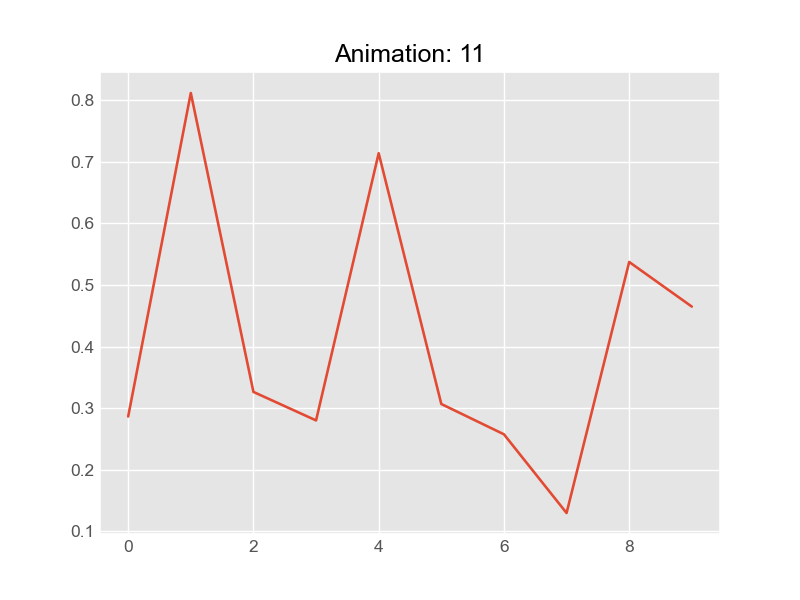

C:\Users\shchur\AppData\Local\Temp\ipykernel_17880\3125378047.py:13: UserWarning:

frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.



In [440]:
from matplotlib import animation
fig, ax = plt.subplots()

def update(curr):
    if curr>10:
        a.event_source.stop()
    ax.clear()
    ax.plot(np.random.rand(10))
    plt.title('Animation: {}'.format(curr)) # need to add it once more since it disappears with ax.clear()
#     ax.set_ylim(0, 1)
    

a = animation.FuncAnimation(fig, update, interval=500) # Note: you need to assign this in order to run the animation if you believe it necessary 
# Note use this name to stop animation

***
<font color = green >

## Interaction
</font>

<IPython.core.display.Javascript object>


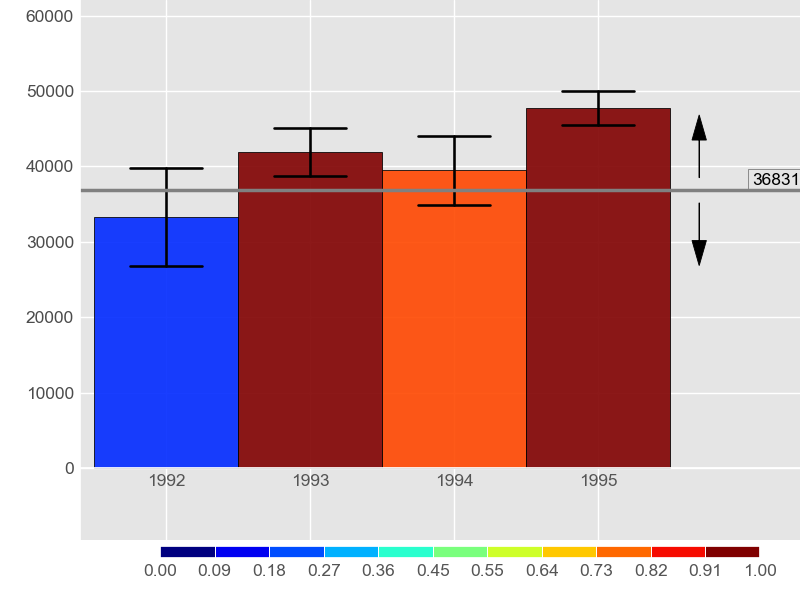

In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib as mpl

def calc_conf_interval(data):
    return st.t.interval(0.95, len(data) - 1, loc=np.mean(data), scale=st.sem(data))

def onclick(event): # create event handler
    print (event.xdata)
    plt.gca().clear()
    update_plt(event.ydata)
    plt.gcf().canvas.draw() # Note: this is required to refresh the current window

def calc_prob(threshold, data_column):
    conf_inerval = calc_conf_interval(data_column)
    data_of_interval = data_column[(conf_inerval[0] <= data_column) & (data_column< conf_inerval[1])]
    data_larger= data_of_interval[threshold< data_of_interval]
    return len(data_larger)/len(data_of_interval ) # percentage of data from coef interval that larger than threshold


def update_plt(y_line=None):
    df_mean = df.mean()  # get mean of every column
    x_vals = np.arange(len(df.columns))

    if not y_line: # set initial = before any mouse click
        y_line= df_mean.mean()

    array_probs = np.array([calc_prob(y_line, df[year_index]) for year_index in df.columns])
    colors = np.array([cmap(array_probs[i]) for i in range(len(df.columns))])  # range 0-1
    bars = plt.bar(x_vals, df_mean, width=1, color = colors, alpha=0.9, edgecolor='black') # plt.errorbar does not work in Jupyter :(
    for i in range(len(df.columns)):
        conf_interval = calc_conf_interval(df[df.columns[i]])
        plt.plot([i, i], conf_interval, '-', color='black')  # draw the vertical line
        for boundary in conf_interval:
            plt.plot([i- 1/4, i + 1/ 4], [boundary, boundary], '-', color = 'black')


    plt.xticks(x_vals, df.columns, color='black', alpha=0.7)
    plt.tick_params(bottom=False)
    plt.yticks(color='black', alpha=0.7)

    max_bar = np.max(df_mean) # get max bar to use it as template for calculation of additional extension of plot area
    ax.axis([-0.6, 4.4, -max_bar*0.2,max_bar*1.3]) # correct plot position
    ax.spines['bottom'].set_position(('data', 0)) # move the x-axis to 0 point

    xmin, xmax = ax.get_xbound() # get x bounds for line
    plt.axhline(y=y_line, xmin=xmin - 2, xmax=xmax, linewidth=2, color='grey') # draw the line for all
    y_template = df_mean[df.columns[0]]/20
    ax.text(xmax, y_line +y_template/5,str(int(y_line)), ha= 'right', va= 'bottom',color= 'black',fontsize= 10,bbox=dict(facecolor='none', edgecolor='gray', pad=2.0))
    ax.arrow(3.70, y_line+ y_template, 0.0, y_template*3, fc="k", ec="k", head_width=0.1, head_length=y_template*2)
    ax.arrow(3.70, y_line - y_template, 0.0, -y_template*3, fc="k", ec="k",
             head_width=0.1, head_length=y_template*2)

    ax.spines['top'].set_visible(False)  # remove the border top
    ax.spines['right'].set_visible(False)  # remove the border right


    bounds = np.linspace(0, 1, 12) # set the bound for color bar
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap, norm=norm,drawedges=True,  ticks=bounds, boundaries=bounds,format='%.2f',orientation='horizontal')

np.random.seed(12345) # allows to get the same random sequesnce at every launch of program
df = pd.DataFrame([np.random.normal(32000,200000,3650),
                   np.random.normal(43000,100000,3650),
                   np.random.normal(43500,140000,3650),
                   np.random.normal(48000,70000,3650)],
                  index=[1992,1993,1994,1995])

df = df.T

fig = plt.figure()
ax_main= plt.gca()
ax_main.axis('off') # remove border and axis
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # create new axis to update x,y,length,hight

fig.canvas.mpl_connect('button_press_event', onclick) # subscribe the event hander to event
cmap = plt.cm.jet # set the color schema
# cmap = mpl.cm.viridis # alternative color chema # https://matplotlib.org/examples/color/colormaps_reference.html

ax_cb = fig.add_axes([0.2, 0.07, 0.75, 0.02]) # create new axis for color bar x,y,length,hight
plt.sca(ax) # set the current axis as active
update_plt() # draw the plot before any click


<font color = green >

### color map
</font>

In [342]:
%matplotlib inline

color for 100 of 256: (0.537755, 0.156894, 0.506551)


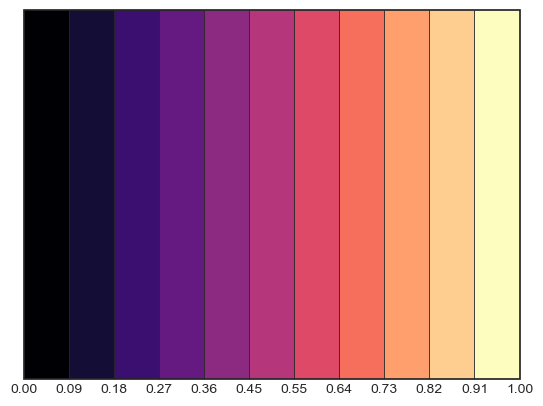

In [344]:
fig, ax = plt.subplots()
bounds = np.linspace(0, 1, 12) # set the bound for color bar
cmap = mpl.cm.magma 
# cmap = mpl.cm.viridis # alternative color chema # https://matplotlib.org/examples/color/colormaps_reference.html
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm,drawedges=True,  ticks=bounds, boundaries=bounds,format='%.2f',orientation='horizontal')
print ('color for 100 of {}: {}'.format(cmap.N, cmap(100)[:3]));

***
<font color = green >

## Visualization with pandas 
</font>

In [442]:
np.random.seed(123) 

#  Cumulative sum (running total) - total sum of data as it grows with time. 
# here it is random steps 
df = pd.DataFrame({'A': np.random.randn(365).cumsum(0),
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20},
                  index=pd.date_range('1/1/2023', periods=365))
df.head()

A          B          C
2023-01-01 -1.085631  20.059291 -20.230904
2023-01-02 -0.088285  21.803332 -16.659325
2023-01-03  0.194693  20.835588 -17.055481
2023-01-04 -1.311601  21.255156 -17.093802
2023-01-05 -1.890202  21.462083 -19.518638

<font color = green >

### pandas plot
</font>

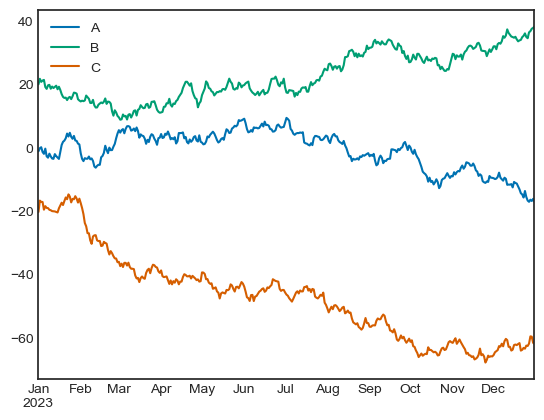

In [195]:
df.plot();
# Note: labels , legend

<font color = green >

### pandas scatter
</font>

<Axes: xlabel='A', ylabel='B'>

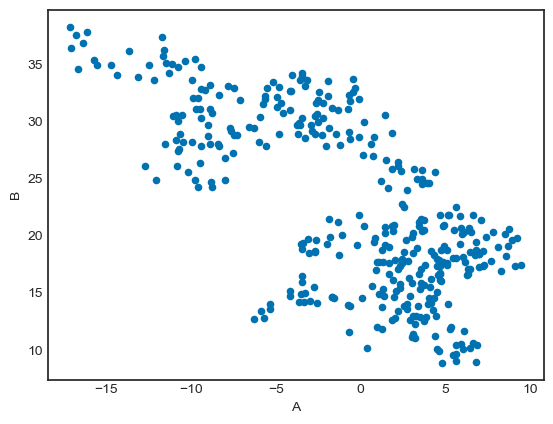

In [196]:
df.plot('A', 'B', kind='scatter')

<IPython.core.display.Javascript object>


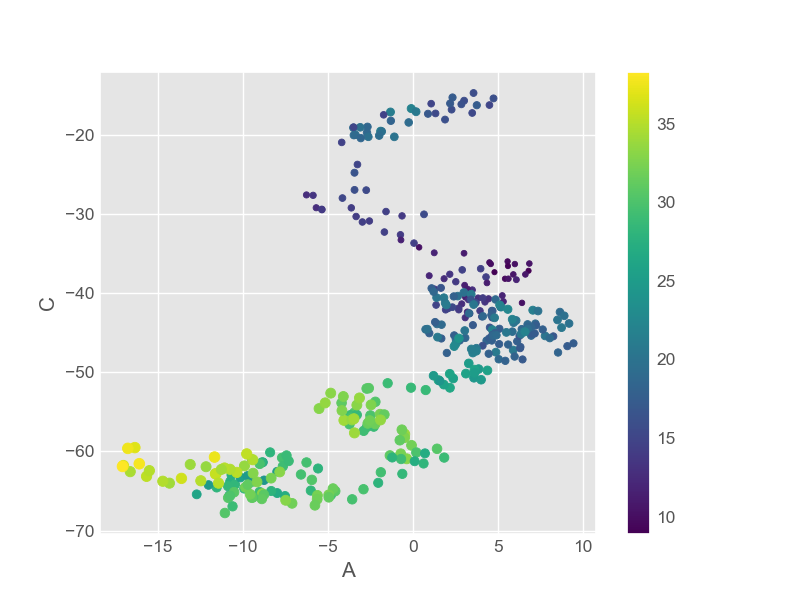

In [443]:
# alternative syntaxis df.plot.scatter instead of kind = 'scatter'
df.plot.scatter('A', 'C', c=df['B'], s=df['B'], cmap='viridis');
# Note:: colorbar

<font color = green >

### pandas histogram
</font>

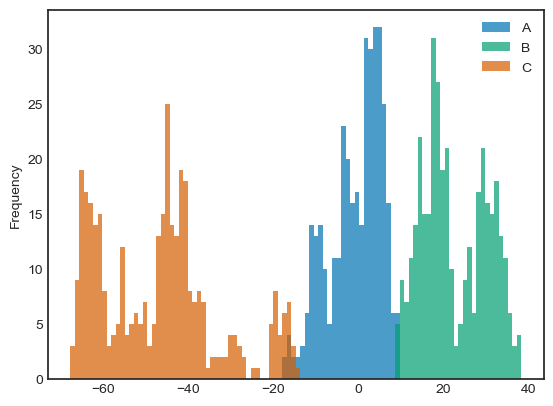

In [198]:
df.plot.hist(alpha=0.7, bins=100);

<font color = green >

### kernel density estimate
</font>

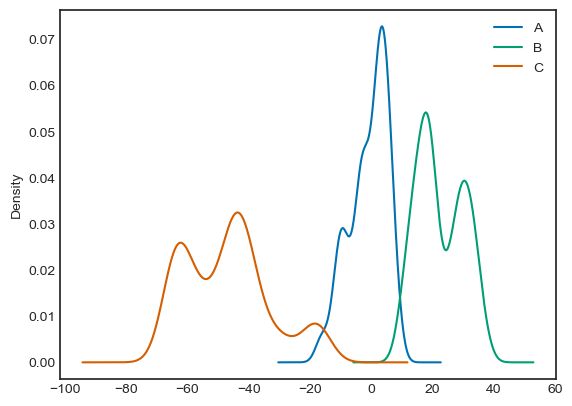

In [199]:
df.plot.kde(); # kernel density estimate

<font color = green >

### Seaborn
</font>

<font color = green >

### Imports
</font>

In [444]:
import seaborn as sns

<font color = green >

### Simple Line Plots
</font>

In [445]:
spotify_data = pd.read_csv("./data/spotify.csv", index_col="Date", parse_dates=True)

In [446]:
spotify_data.sample(10)

Shape of You   Despacito  Something Just Like This    HUMBLE.  \
Date                                                                        
2017-08-28       5052322   8245177.0                 2965292.0  3805542.0   
2018-01-02       4541816   3980200.0                 2368870.0  2505241.0   
2017-10-25       4092810   3979854.0                 2177538.0  2808765.0   
2017-06-16       8108408  19658830.0                 5431826.0  6783439.0   
2017-06-19       7222278  17678927.0                 4899566.0  6109417.0   
2017-06-15       7788117  18859909.0                 5240236.0  6658054.0   
2017-05-23       8482709  20206249.0                 5583887.0  7963927.0   
2017-01-12      14148108         NaN                       NaN        NaN   
2017-09-13       4486914   6372277.0                 2730972.0  3362267.0   
2017-07-25       6084365  13083960.0                 3966279.0  4057663.0   

            Unforgettable  
Date                       
2017-08-28      6155840.0  
2018-01-02      2683769.0  
2017-10-25      4097702.0  
2017-06-16      6671912.0  
2017-06-19      6479657.0  
2017-06-15      6539428.0  
2017-05-23      5109260.0  
2017-01-12            NaN  
2017-09-13      5813366.0  
2017-07-25      7142650.0

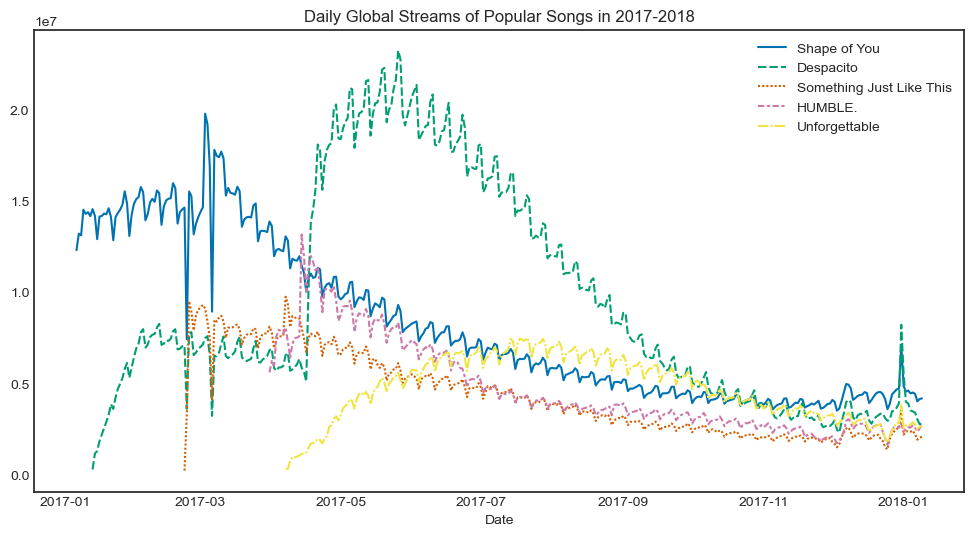

In [205]:
fig = plt.figure(figsize=(12,6))
plt.title("Daily Global Streams of Popular Songs in 2017-2018")
sns.lineplot(data=spotify_data);

<IPython.core.display.Javascript object>


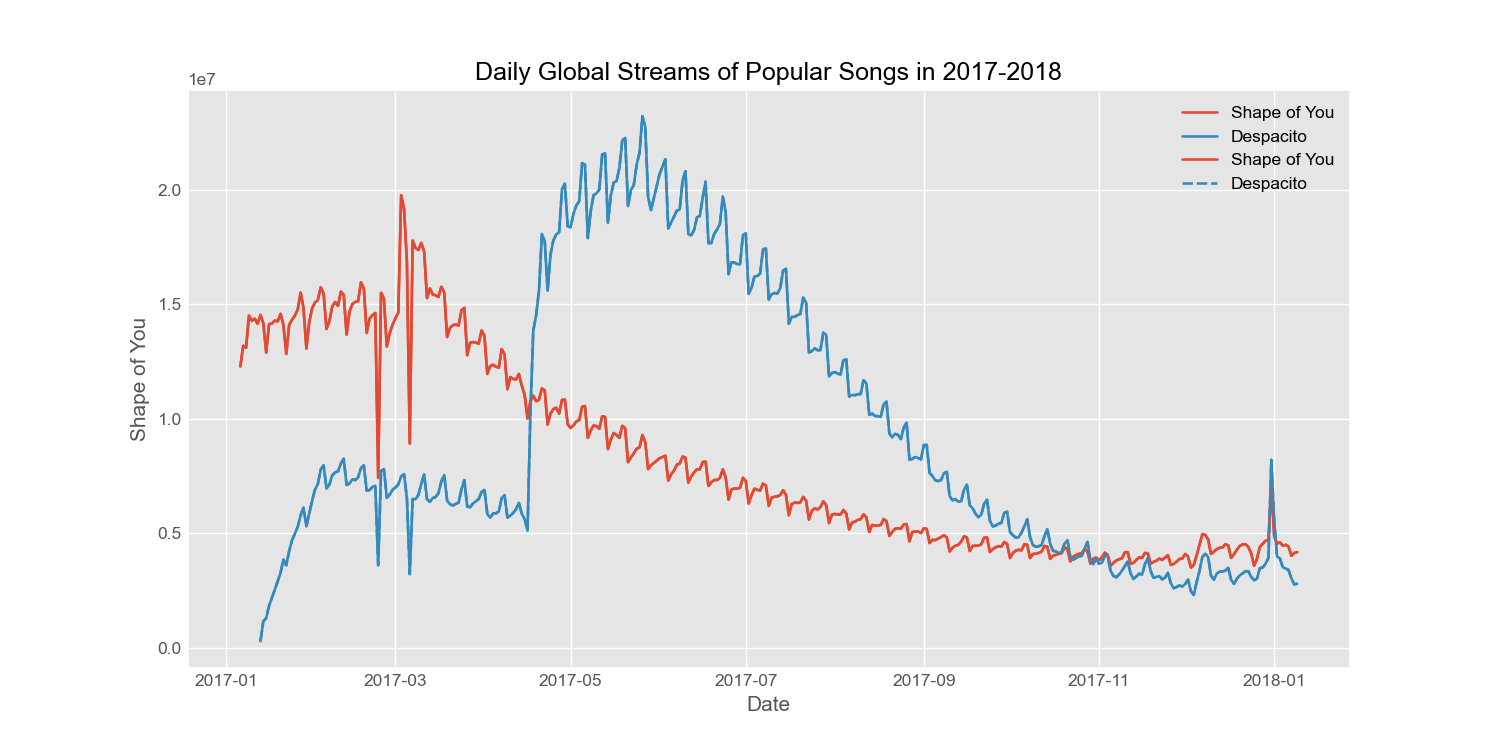

In [451]:
# Set the width and height of the figure
fig = plt.figure(figsize=(12,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=spotify_data['Shape of You'], label="Shape of You")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=spotify_data['Despacito'], label="Despacito")

# Add label for horizontal axis
plt.xlabel("Date");

In [456]:
%matplotlib inline

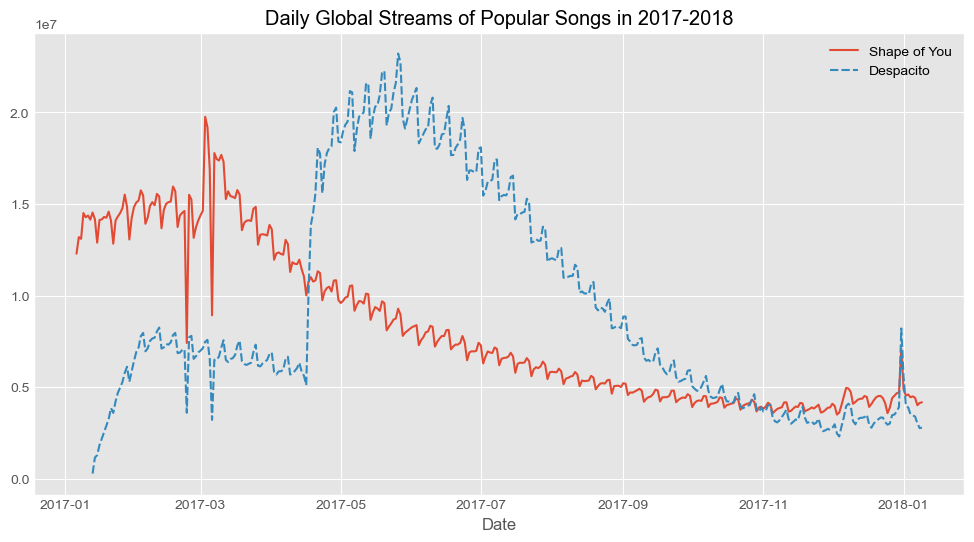

In [457]:
fig = plt.figure(figsize=(12,6))

plt.title("Daily Global Streams of Popular Songs in 2017-2018")
sns.lineplot(data=spotify_data[['Shape of You', 'Despacito']]);

<font color = green >

### Bar Charts and Heatmaps
</font>

In [458]:
df_flights = pd.read_csv("./data/flight_delays.csv", index_col="Month")

In [459]:
df_flights.tail()

AA        AS         B6        DL        EV         F9        HA  \
Month                                                                           
8      3.193907  2.503899   9.280950  0.653114  5.154422   9.175737  7.448029   
9     -1.432732 -1.813800   3.539154 -3.703377  0.851062   0.978460  3.696915   
10    -0.580930 -2.993617   3.676787 -5.011516  2.303760   0.082127  0.467074   
11     0.772630 -1.916516   1.418299 -3.175414  4.415930  11.164527 -2.719894   
12     4.149684 -1.846681  13.839290  2.504595  6.685176   9.346221 -1.706475   

             MQ         NK         OO        UA  US         VX        WN  
Month                                                                     
8      1.896565  20.519018   5.606689  5.014041 NaN   5.106221  5.532108  
9     -2.167268   8.000101   1.530896 -1.794265 NaN   0.070998 -1.336260  
10    -3.735054   6.810736   1.750897 -2.456542 NaN   2.254278 -0.688851  
11     0.220061   7.543881   4.925548  0.281064 NaN   0.116370  0.995684  
12     0.662486  12.733123  10.947612  7.012079 NaN  13.498720  6.720893

We'd like to create a bar chart showing the average arrival delay for United Airlines (airline code: UA) flights, by month.

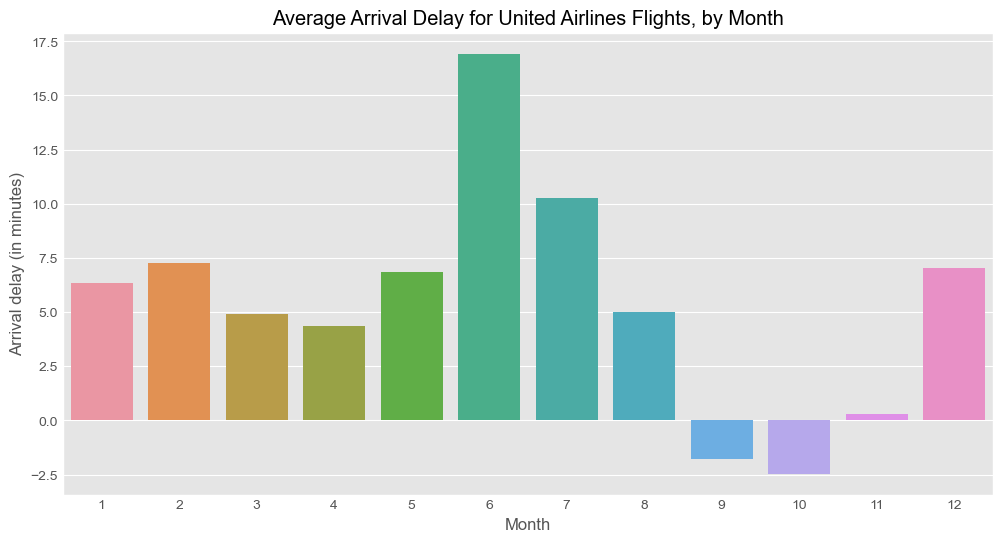

In [460]:
# Set the width and height of the figure
fig = plt.figure(figsize=(12,6))

# Add title
plt.title("Average Arrival Delay for United Airlines Flights, by Month")

# Bar chart showing average arrival delay for United Airlines flights by month
sns.barplot(x=df_flights.index, y=df_flights['UA'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)");

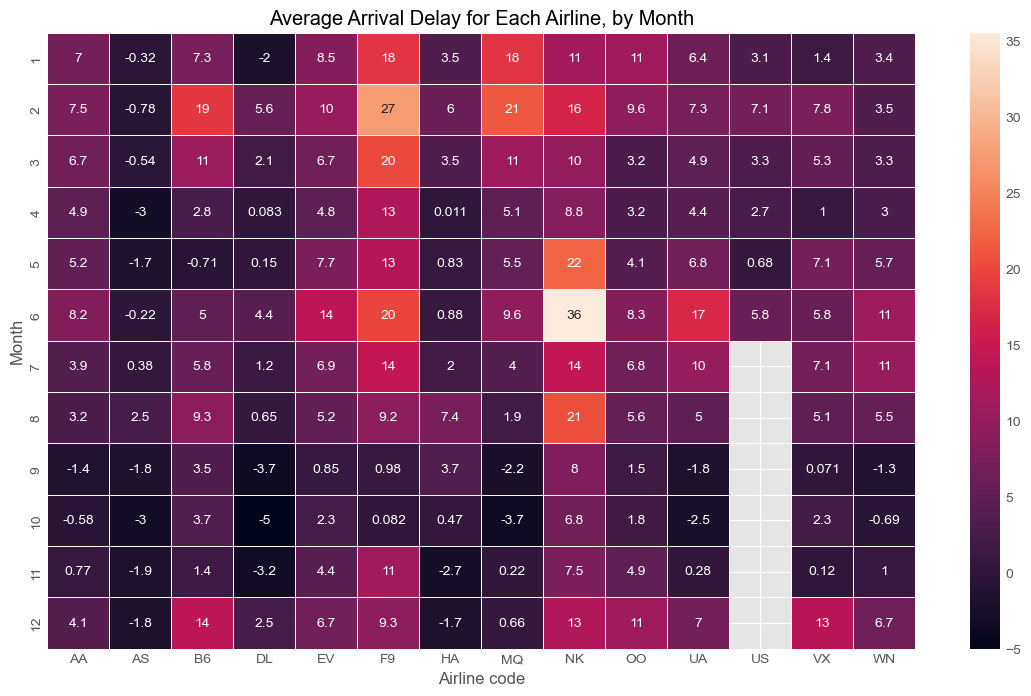

In [461]:
# Set the width and height of the figure
fig = plt.figure(figsize=(14,8))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=df_flights, annot=True, linewidths=0.5, cmap="rocket")

# Add label for horizontal axis
plt.xlabel("Airline code");

<font color = green >
    
# Plotly
</font>

<font color = green >
    
###  What is Plotly
</font>

* A powerful JavaScript graphing library
* No worries - no need to know JavaScript
    
<font color = green >
    
### Main advantages:
</font>

* Fast and easy to implement simple plots
* Low code/low effort options using plotly.express
* Extremely customizable
* Interactive plots by default

<font color = green >
    
### Creating Plotly Figures:
</font>

* With plotly.express (px) for simple, quick plots
* With plotly.graph_objects (go) for more customization
* With plotly.figure_factory for specific, advanced figures


<font color = green >
    
#### Plotly figure has 3 main components:
</font>

* <b>layout</b> - Dictionary controlling style of the figure
    * One <b>layout</b> per figure
* <b>data</b> - List of dictionaries setting the graph type and data itself
    * Data + type = <b>trace</b>
    * Can have multiple traces per graph
* <b>frames</b> - For animated plots

<font color = green >

### Imports
</font>

In [212]:
import plotly.express as px
import plotly.graph_objects as go

Constructing the figure from scratch:

In [213]:
figure_config = {
    "data": [
        {
            "type": "bar",
            "x": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
            "y": [28, 27, 25, 31, 32, 35, 36]
        }
    ],
    "layout": {
        "title": {
            "text": "Temperatures of the week",
            "x": 0.5,
            "font": {
                "color": "red",
                "size": 20
            }
        }
    }
}

fig = go.Figure(figure_config)
fig.show()

<font color = green >

### Box plots
</font>

In [214]:
df_temps = pd.DataFrame({
    "day": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    "temp": [28, 27, 25, 31, 32, 35, 36]
})

df_temps

day  temp
0     Monday    28
1    Tuesday    27
2  Wednesday    25
3   Thursday    31
4     Friday    32
5   Saturday    35
6     Sunday    36

In [60]:
trace = go.Box(x=df_flights['UA'], name="Disctribution", fillcolor='navy')
data = [trace]
fig = go.Figure(data)
fig.show()

<font color = green >

### Bar Charts
</font>

In [61]:
fig = px.bar(data_frame=df_temps, x="day", y="temp", title="Temperatures of the week")
fig.show()

<font color = green >

### Line plots
</font>

In [62]:
fig = px.line(spotify_data)
fig.update_yaxes({"title":"Amount of listens"})
fig.show()

<font color = green >

### Histogram
</font>

In [63]:
normal_distribution = np.random.randn(10000)

fig = px.histogram(normal_distribution, nbins=100)
fig.show()

<font color = green >

### Pie charts
</font>

In [215]:
df = pd.read_csv('./data/nycflights.csv')
df = df.drop(df.columns[[0]], axis=1)
df.sample(5)

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
216911  2013      5   26    1251.0       -4.0    1528.0      -14.0      B6   
212956  2013      5   22       2.0        3.0     354.0        4.0      B6   
232467  2013      6   12     642.0       -6.0     904.0      -32.0      UA   
197043  2013      5    4    2100.0       -5.0    2249.0      -18.0      EV   
252915  2013      7    3    1523.0       24.0    1819.0       18.0      9E   

       tailnum  flight origin dest  air_time  distance  hour  minute  
216911  N632JB     141    JFK  PBI     139.0      1028  12.0    51.0  
212956  N535JB     739    JFK  PSE     209.0      1617   0.0     2.0  
232467  N76522    1627    EWR  PBI     123.0      1023   6.0    42.0  
197043  N12172    4499    EWR  CHS      91.0       628  21.0     0.0  
252915  N923XJ    3325    JFK  DFW     189.0      1391  15.0    23.0

In [220]:
dff = df['carrier'].value_counts()[:10]
dff = dff.append(pd.Series({"others": df['carrier'].value_counts()[10:].sum()}))
label = dff.index
size = dff.values

colors = ['skyblue', '#FEBFB3', '#96D38C', '#D0F9B1', 'gold', 'orange', 'lightgrey', 
          'lightblue','lightgreen','aqua']

trace = go.Pie(labels=label, values=size, marker=dict(colors=colors), hole=0.2)

data = [trace]
layout = go.Layout(
    title='Airline distribution'
)

fig = go.Figure(data=data, layout=layout)
fig.show()

C:\Users\shchur\AppData\Local\Temp\ipykernel_17880\206326855.py:2: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<font color = green >

#  Widgets
</font>

jupyter widgets forms a framework for representing python objects interactively. 

[video scipy2018](https://www.youtube.com/watch?v=NBZBjEjN-rU)


[scipy2017-jupyter-widgets-tutorial](https://github.com/mwcraig/scipy2017-jupyter-widgets-tutorial/tree/master/notebooks)

<font color = green >

## interact
</font>

The `interact` function (`ipywidgets.interact`) automatically creates user interface (UI) controls for exploring code and data interactively. 

It is the easiest way to get started using IPython's widgets.

In [463]:
from ipywidgets import interact 

In [464]:
def f(x):
    print(x * x)

In [465]:
interact(f, x=(0, 50));

interactive(children=(IntSlider(value=25, description='x', max=50), Output()), _dom_classes=('widget-interact'…

<font color = green >

## FloatSlider
</font>

In [466]:
from ipywidgets import FloatSlider 

In [467]:
slider = FloatSlider(
    value=7.5,
    min=5.0,
    max=10.0,
    step=0.1,
    description='Input:',
)
slider

FloatSlider(value=7.5, description='Input:', max=10.0, min=5.0)

In [468]:
slider

FloatSlider(value=7.5, description='Input:', max=10.0, min=5.0)

In [472]:
# get value 
slider.value

6.3

In [473]:
# set the value 
slider.value = 7 # you cannot set less than min 
slider.value

7.0

<font color = green >

## observe (handle change)
</font>

You can trigger actions in the kernel when a control value changes by "observing" the value. Here we set a global variable when the slider value changes.

In [474]:
square = slider.value * slider.value
slider.value, square

(7.0, 49.0)

In [478]:
def handle_change(change):
#     print ('test1')
    global square
    square = change.new * change.new
#     print ('square = ', square)
slider.observe(handle_change, 'value')

In [480]:
slider

FloatSlider(value=7.0, description='Input:', max=10.0, min=5.0)

In [482]:
# observe the square is updated 
slider.value, square

(8.7, 75.68999999999998)

<font color = green >

## link
</font>

You can link control attributes and lay them out together

In [483]:
from ipywidgets import FloatText, link, VBox

In [485]:
text = FloatText(description='Value')
link((slider, 'value'), (text, 'value'))
slider

FloatSlider(value=6.9, description='Input:', max=10.0, min=5.0)

In [486]:
text

FloatText(value=6.9, description='Value')

In [300]:
# ay them out together
VBox([slider, text])

#### Python widgets are composed of two pieces:

* Python, which runs in the notebook kernel.
* Javascript, which runs in the browser.

<font color = green >

## Visualization sample
</font> 

[short video](https://youtu.be/kbgST0uifvM)
<br>[source page](https://github.com/mwcraig/scipy2017-jupyter-widgets-tutorial/blob/master/notebooks/01.00-overview.ipynb)
<br>[source code for visualization](https://github.com/JuanCab/AstroInteractives)

<font color = green >

## More about widgets
</font>  

### Widgets without writing widgets: interact

In [487]:
def f(x):
    return 5 * x , x

When you pass this function as the first argument to `interact` along with an **integer keyword argument (x=10)**, 
<br>a **slider** is generated and bound to the function parameter.


In [488]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

Note: the `;` at the end causes output without `<function __main__.f(x)>`

If you pass **True or False**, interact will generate a **checkbox**:

In [489]:
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [490]:
# True is casted to 1 and False - to 0 
5 * True

5

If you pass a **string**, interact will generate a **Text field**.

In [492]:
interact(f, x='Hi there!');

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

interact can also be used as a **decorator**. 

In [242]:
@interact(x=True, y=1.0, z='hi')
def g(x, y, z):
    return (x, y, z)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

This results the same as the following :

In [243]:
def h(x, y, z):
    return (x, y, z)
interact(h, x =True, y=1.0, z= 'hi');

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

Note: interact also works with functions that have multiple arguments.

In [493]:
from ipywidgets import fixed
interact(h, x=True, y=fixed(0.5), z='test');

interactive(children=(Checkbox(value=True, description='x'), Text(value='test', description='z'), Output()), _…

Note: No slider is produced for y as its value is fixed.

<font color = green >

## Widget abbreviations
</font>

When you pass an integer-valued keyword argument of 10 (x=10) to interact, it generates an integer-valued slider control with a range of [-10,+3*10]. In this case, 10 is an abbreviation for an actual slider widget:

`IntSlider(min=-10,max=30,step=1,value=10)`

In [496]:
from ipywidgets import IntSlider
IntSlider(min=-10,max=30,step=1,value=10)

IntSlider(value=10, max=30, min=-10)

In [495]:
# the same as interact(f, x=10) but configuring IntSlider explicitely:
from ipywidgets import widgets
interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<font color = green >

## Dropdown
</font>

In [247]:
interact(f, x=['apples','oranges']);

interactive(children=(Dropdown(description='x', options=('apples', 'oranges'), value='apples'), Output()), _do…

#### Dropdown menu that passes non-string values to the Python function.
pass a list of tuples of the form `('label', value)`

In [499]:
f??

In [500]:
interact(f, x=[('one', 10), ('two', 20)]);

interactive(children=(Dropdown(description='x', options=(('one', 10), ('two', 20)), value=10), Output()), _dom…

### interactive

Unlike interact, interactive returns a **widget instance** instead of displaying the widget.

In [314]:
from ipywidgets import interactive
from IPython.display import display

def f(a, b):
    display(a + b)
    return a+b

In [317]:
w = interactive(f, a=10, b=20)

In [251]:
type(w)

ipywidgets.widgets.interaction.interactive

In [252]:
w.children

(IntSlider(value=10, description='a', max=30, min=-10),
 IntSlider(value=20, description='b', max=60, min=-20),
 Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '30'}, 'metadata': {}},)))

To display the widget, use `display`

In [253]:
display(w)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

In [254]:
w.kwargs

{'a': 10, 'b': 20}

In [255]:
w.result

30

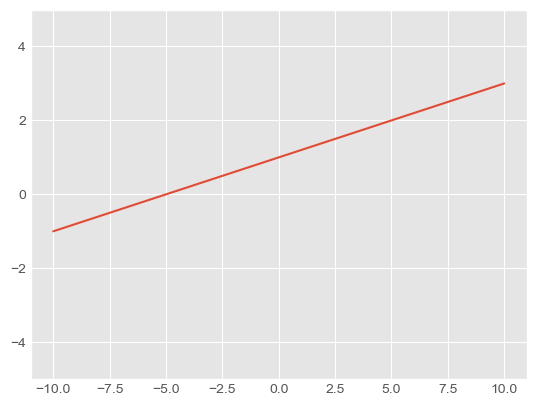

In [502]:
import matplotlib.pyplot as plt
import numpy as np

def f(k, b):
    fig = plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, k * x + b)
    plt.ylim(-5, 5)
    plt.show()
f(0.2, 1)    

In [257]:
interactive_plot = interactive(f, k=(-2.0, 2.0), b=(-3, 3, 0.5))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='k', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

<font color = green >

### Run interaction manually
</font>

In [503]:
from ipywidgets import interact_manual
def slow_function(i):
    """
    Sleep for 1 second then print the argument
    """
    from time import sleep
    print('Sleeping...')
    sleep(1)
    print('value = ',i)

interact_manual(slow_function,i=widgets.FloatSlider(min=1e4, max=1e6, step=1e4));

interactive(children=(FloatSlider(value=10000.0, description='i', max=1000000.0, min=10000.0, step=10000.0), B…

You can do the same thing with `interactive` by using the a dict as the second argument

In [259]:
_interactive = interactive(slow_function, {'manual': True}, i=widgets.FloatSlider(min=1e4, max=1e6, step=1e4))
_interactive

interactive(children=(FloatSlider(value=10000.0, description='i', max=1000000.0, min=10000.0, step=10000.0), B…

#### Alternative syntax to call interact 

In [260]:
from ipywidgets import widgets
interact == widgets.interact

True

<font color = green >
    
## Select widget implicitely
### SelectionSlider sample
</font> 

In [504]:
def show_day(date):
    return date.strftime("%m-%d-%Y")
    
    
import datetime
options= [datetime.datetime(2020, 2, 2, 1, 0), 
          datetime.datetime(2020, 2, 3, 5, 0), 
          datetime.datetime(2020, 2, 4, 9, 0), 
          datetime.datetime(2020, 2, 5, 13, 0), 
          datetime.datetime(2020, 2, 6, 17, 0), 
          datetime.datetime(2020, 2, 7, 21, 0)]

slider = widgets.SelectionSlider(options=options, layout={'width': '700px'})
interact(
    show_day,
    date = slider
);

interactive(children=(SelectionSlider(description='date', layout=Layout(width='700px'), options=(datetime.date…

<font color = green >
    
### Calendar sample
</font>

In [505]:
calendar = widgets.DatePicker(
           description='Select Date')
calendar

DatePicker(value=None, description='Select Date', step=1)

In [506]:
calendar.value

datetime.date(2023, 10, 13)

In [507]:
# to handle changes
interact(
    show_day,
    date=calendar
);

interactive(children=(DatePicker(value=datetime.date(2023, 10, 13), description='Select Date', step=1), Output…

<font color = green >
    
### Horizontal box sample
</font>

In [265]:
text = widgets.Text(
       value='My Text',
       description='Title', )

slider = widgets.FloatSlider(
         value=1,
         min=0,
         max=10.0,
         step=0.1,)
menu = widgets.Dropdown(
       options=['red', 'blue', 'green'],
       value='red',
       description='Color:')

checkbox = widgets.Checkbox(
           description='Check to invert',)

box1 = widgets.VBox([text, slider])
box2 = widgets.VBox([menu, checkbox])

children= widgets.HBox([box1, box2])
children

<font color = green >
    
### Tab sample
</font>

In [266]:
# defining a list with the contents of our windows
children = [box1, box2]
# initializing a tab
tab = widgets.Tab()
# setting the tab windows 
tab.children = children
# changing the title of the first and second window
tab.set_title(0, 'box1')
tab.set_title(1, 'box2')
tab

<font color = green >
    
### Buttom sample
</font>

In [267]:
button = widgets.Button(description='New Button')

def on_button_clicked(_): 
    print('Something happens!')
# link button and function together using a button's method
button.on_click(on_button_clicked)

button

Button(description='New Button', style=ButtonStyle())

Something happens!
Something happens!
Something happens!
Something happens!


<font color = green >

## Layout and Styling of Jupyter widgets
### Layout
</font>

In [268]:
from ipywidgets import Button, Layout

b = Button(
    description='(50% width, 80px height) button',
    layout=Layout(width='50%', height='80px', border='2px dotted blue')
)
b

Button(description='(50% width, 80px height) button', layout=Layout(border_bottom='2px dotted blue', border_le…

<font color = green >

### Style
</font>

In [322]:
IntSlider(description='A too long description')

IntSlider(value=0, description='A too long description')

In [325]:
style = {'description_width': 'initial'}
IntSlider(description='A too long description', style=style)

IntSlider(value=0, description='A too long description', style=SliderStyle(description_width='initial'))

<font color = green >

### Provide style using its attributes
</font> 

In [271]:
b1 = Button(description='A', layout=Layout(border='2px solid green'))
b1.style.button_color = 'lightgreen'
b1

Button(description='A', layout=Layout(border_bottom='2px solid green', border_left='2px solid green', border_r…

In [272]:
b1.style.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'button_color',
 'font_family',
 'font_size',
 'font_style',
 'font_variant',
 'font_weight',
 'text_color',
 'text_decoration']

<font color = green >

### Some more samples
</font>  

In [273]:
from ipywidgets import Button, HBox, VBox

words = ['A', 'B', 'C', 'D']
items = [Button(description=w, layout=Layout(border='2px solid green')) for w in words]
left_box = VBox([items[0], items[1]])
right_box = VBox([items[2], items[3]])
HBox([left_box, right_box])

In [274]:
from ipywidgets import Layout, Button, Box, Label

item_layout = Layout(height='100px', min_width='40px')
items = [Button(layout=item_layout, description=str(i), button_style='warning') for i in range(40)]
box_layout = Layout(overflow_x='scroll',
                    border='3px solid black',
                    width='500px',
                    height='',
                    flex_direction='row',
                    display='flex')
carousel = Box(children=items, layout=box_layout)

VBox([Label('Scroll horizontally:'), carousel])


### What have you learned?


Since it's not always easy to decide how to best tell the story behind your data, we've broken the chart types into three broad categories to help with this.

<b>Trends</b> - A trend is defined as a pattern of change.
* Line charts are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.

<b>Relationship</b> - There are many different chart types that you can use to understand relationships between variables in your data.
* Bar charts are useful for comparing quantities corresponding to different groups.
* Heatmaps can be used to find color-coded patterns in tables of numbers.
* Scatter plots show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable.

<b>Distribution</b> - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
* Histograms show the distribution of a single numerical variable.
* Box plots show demographic representation of numerical data through their quartiles

<font color = green >

# <center>Homework<center>
</font>

__Exploratory Data Analysis (EDA)__ of car insurance dataset.
    
__Dataset description:__ Car insurance claim. As you are working in the insurance company. Company wants to know the reason why claim was not made. Doing so would allow insurance company to improve there policy for giving loan to the customer. In this project you are dealing with various feature such as age, occupation etc. based on that let's get back to the final conculsion.    

__Steps:__
- Data Cleaning
- Descriptive Statistics
- Data Visualization
- Conclusions

In [508]:
import pandas as pd
pd.read_csv("./data/Car_Insurance_Claim.csv").head()

Unnamed: 0      ID    AGE  GENDER      RACE DRIVING_EXPERIENCE  \
0           0  569520    65+  female  majority               0-9y   
1           1  750365  16-25    male  majority               0-9y   
2           2  199901  16-25  female  majority               0-9y   
3           3  478866  16-25    male  majority               0-9y   
4           4  731664  26-39    male  majority             10-19y   

     EDUCATION         INCOME        CREDIT_SCORE VEHICLE_OWNERSHIP  \
0  high school    upper class   0.629027313918201               1.0   
1         none        poverty  0.3577571170184627               0.0   
2  high school  working class  0.4931457852181982               1.0   
3   university  working class  0.2060128507324556               1.0   
4         none  working class  0.3883658881572184               1.0   

  VEHICLE_YEAR MARRIED CHILDREN POSTAL_CODE ANNUAL_MILEAGE VEHICLE_TYPE  \
0   after 2015     0.0      1.0       10238        12000.0        sedan   
1  before 2015     0.0      0.0       10238        16000.0        sedan   
2  before 2015     0.0      0.0       10238        11000.0        sedan   
3  before 2015     0.0     none       32765        11000.0        sedan   
4  before 2015     0.0      0.0     32765.0        12000.0        sedan   

  SPEEDING_VIOLATIONS DUIS PAST_ACCIDENTS OUTCOME  
0                   0    0              0     0.0  
1                   0    0              0     1.0  
2                   0    0              0     0.0  
3                   0    0              0     0.0  
4                   2    0              1     1.0

<font color = green >

# <center>Learn more<center>
</font>

Documentation for Matplotlib
<br>https://matplotlib.org/index.html
<br>Applied Plotting, Charting & Data Representation in Python
<br>https://www.coursera.org/courses?query=plotting%20charting
<br>Ten Simple Rules for Better Figures
<br>https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833#s8
<br>Hunter, J., & Droettboom, M. (2012). matplotlib in A. Brown (Ed.), The Architecture of Open Source Applications, Volume II: Structure, Scale, and a Few More Fearless Hacks (Vol. 2)
<br>http://www.aosabook.org/en/matplotlib.html
<br>seaborn: statistical data visualization
<br>https://seaborn.pydata.org/index.html